In [42]:

import tensorflow as tf
from keras import Sequential,Model
from keras.layers import LSTM, Dense, Input
import numpy as np

from keras.utils import plot_model


In [43]:
X = np.array([x+1 for x in range(45)])
X = X.reshape(15,3,1)

Y = []
for x in X:
    Y.append(x.sum())
Y = np.array(Y)

print(X)
print(Y)

[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]
[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


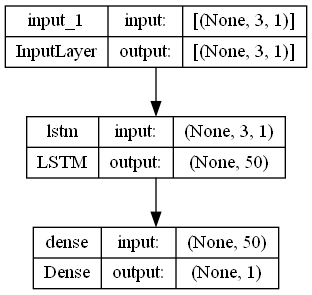

In [49]:

tf.keras.backend.clear_session()

inputs = Input(shape=(3,1))
lstm = LSTM(50, activation="relu")(inputs)
outputs = Dense(1)(lstm)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='mse')

model.summary()
plot_model (model, to_file = "Many2One.png", show_shapes = True, show_layer_names = True)

In [50]:

model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=1000, validation_split=0.2)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 3874.7644 - val_loss: 14250.0234
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 3860.3792 - val_loss: 14204.3545
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 3846.1738 - val_loss: 14158.3447
Epoch 4/1000
1/1 [==============================] - 0s 43ms/step - loss: 3831.8821 - val_loss: 14111.9482
Epoch 5/1000
1/1 [==============================] - 0s 30ms/step - loss: 3817.4929 - val_loss: 14065.1182
Epoch 6/1000
1/1 [==============================] - 0s 33ms/step - loss: 3802.9954 - val_loss: 14017.7939
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 3788.3857 - val_loss: 13969.9141
Epoch 8/1000
1/1 [==============================] - 0s 32ms/step - loss: 3773.6738 - val_loss: 13921.4102
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 3758.9509 - val_loss: 13872.8486
Epoch 10/1000
1/1 [=============================

In [51]:
test_input = np.array([50,51,52])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[153.01118]]


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 lstm_17 (LSTM)              (None, 1)                 12        
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


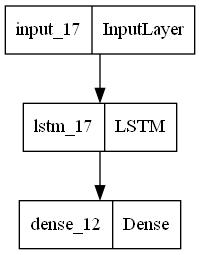

In [68]:
inputs = Input((8,1))
lstm = LSTM(1)
x = lstm(inputs)
outputs = Dense(1)(x)

model = Model(inputs,outputs)
model.summary()
plot_model(model)